In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import joblib

import sys
sys.path.append('../utils')

from transformations import get_continent, del_cols, dummies


In [2]:
df_2019 = pd.read_csv('../data/2019.csv')
print(df_2019.shape)
df_2019.head()

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# corr_df = df_2019.select_dtypes(include=['int', 'float'])
# corr_df.corr()

In [3]:
df_2018 = pd.read_csv('../data/2018.csv')
print(df_2018.shape)
df_2018.head()

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [5]:
# corr_df = df_2018.select_dtypes(include=['int', 'float'])
# corr_df.corr()

In [4]:
df_2017 = pd.read_csv('../data/2017.csv')
print(df_2017.shape)
df_2017.head()

(155, 12)


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
# corr_df = df_2017.select_dtypes(include=['int', 'float'])
# corr_df.corr()

In [5]:
df_2016 = pd.read_csv('../data/2016.csv')
print(df_2016.shape)
df_2016.head()

(157, 13)


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [9]:
# corr_df = df_2016.select_dtypes(include=['int', 'float'])
# corr_df.corr()

In [6]:
df_2015 = pd.read_csv('../data/2015.csv')
print(df_2015.shape)
df_2015.head()

(158, 12)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [11]:
# corr_df = df_2015.select_dtypes(include=['int', 'float'])
# corr_df.corr()

In [7]:
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019]
for df in df_list:
    print(df.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

We can see that the columns in common for all datasets are: Country, happiness score, GDP per capita, Life expectancy, freedom, generosity, and trust /government corruption.

The columns that we are going to remove before merging are: Region, Standard Error (present in 2015 dataset), Family and Dystopia residual (not present in 2018 and 2019), whisker high and low (present in 2017 dataset), social support (in both 2018 and 2019 datasets), Lower confidence interval, and Upper confidence interval (last two, present in 2016 dataset).


**Dropping**

In [8]:
df_2015.drop(columns=['Region', 'Standard Error', 'Family', 'Dystopia Residual'], inplace=True)
df_2016.drop(columns=['Region', 'Family', 'Dystopia Residual', 'Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
df_2017.drop(columns=['Whisker.high', 'Family','Whisker.low', 'Dystopia.Residual'], inplace=True)
df_2018.drop(columns=['Social support'], inplace=True)
df_2019.drop(columns=['Social support'], inplace=True)

**Renaming**

In [9]:
names = {'Overall rank': 'Happiness Rank', 'Country or region': 'Country', 'Score': 'Happiness Score',
         'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom', 
         'Perceptions of corruption': 'Government Corruption'}
df_2018 = df_2018.rename(columns=names)
df_2019 = df_2019.rename(columns=names)


In [10]:
names = {'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 
         'Economy..GDP.per.Capita.': 'GDP per capita', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
         'Trust..Government.Corruption.': 'Government Corruption'}
df_2017 = df_2017.rename(columns=names)

In [11]:
names = {'Economy (GDP per Capita)': 'GDP per capita',
         'Trust (Government Corruption)': 'Government Corruption'}
df_2016 = df_2017.rename(columns=names)
df_2015 = df_2015.rename(columns=names)

In [12]:
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019]
for df in df_list:
    print(df.columns)

Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Government Corruption',
       'Generosity'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'],
      dtype='object')
Index(['Happiness Rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'],
      dtype='object')
Index(['Happiness Rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'],
      dtype='object')


**Check and reorder columns**

In [13]:
common_columns = ['Happiness Rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Government Corruption'] 

df_2015 = df_2015[common_columns]
df_2016 = df_2016[common_columns]
df_2017 = df_2017[common_columns]
df_2018 = df_2018[common_columns]
df_2019 = df_2019[common_columns]

#### Merge data

In [14]:
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

In [15]:
print(df.shape)
df.head()

(780, 8)


,Happiness Rank,Country,Happiness Score,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption
0,1,Switzerland,7.587,1.39651,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,7.561,1.30232,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,7.527,1.32548,0.87464,0.64938,0.34139,0.48357
3,4,Norway,7.522,1.45900,0.88521,0.66973,0.34699,0.36503
4,5,Canada,7.427,1.32629,0.90563,0.63297,0.45811,0.32957


In [16]:
df.isna().sum()

Happiness Rank              0
Country                     0
Happiness Score             0
GDP per capita              0
Health (Life Expectancy)    0
Freedom                     0
Generosity                  0
Government Corruption       1
dtype: int64

As we can see, there's a null value in the dataset, i'm going to drop it since it's not a significant data loss.

In [17]:
df.dropna(inplace=True)

In [18]:
df.to_csv('../data/merged_data.csv', index = False)

In [19]:
# creating a df to plot
plot_df = df.select_dtypes(include=['int', 'float'])

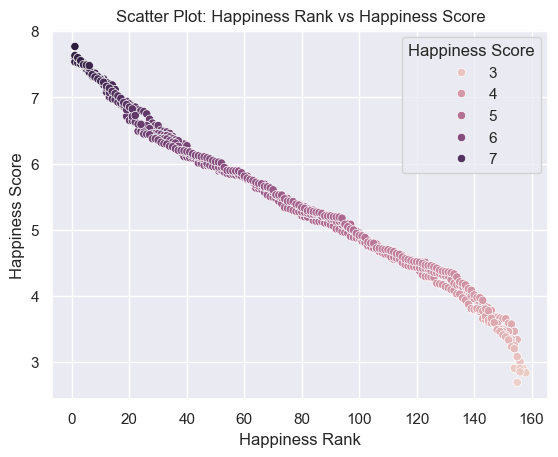

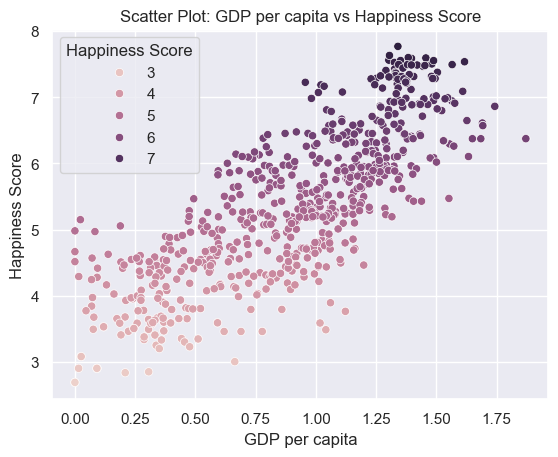

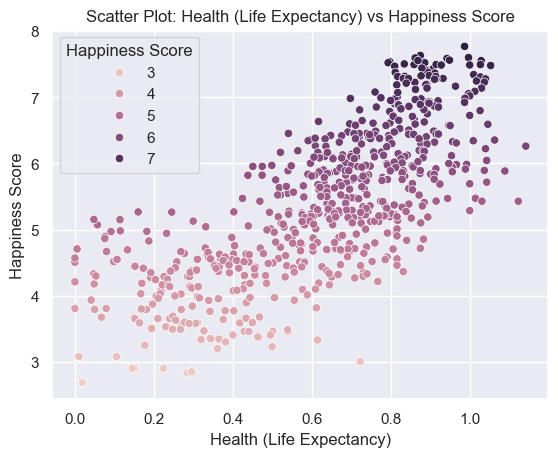

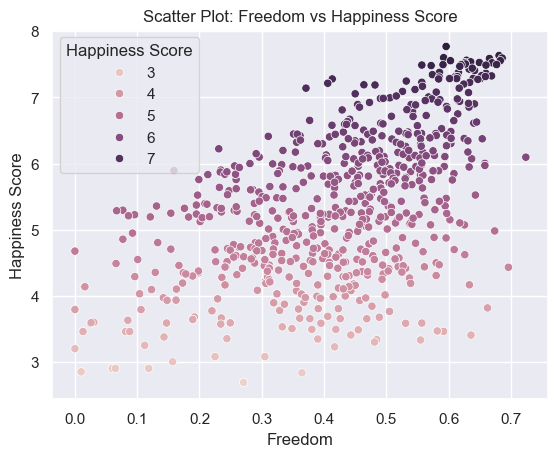

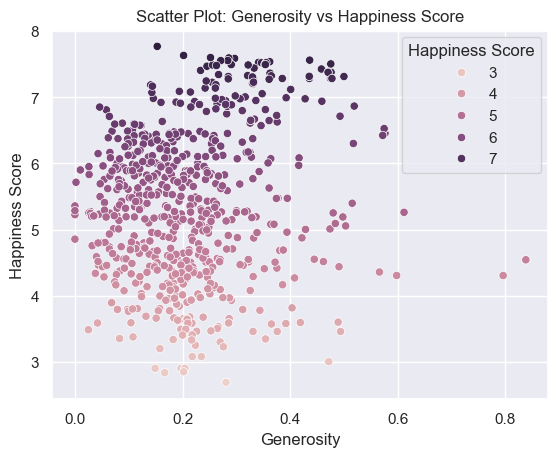

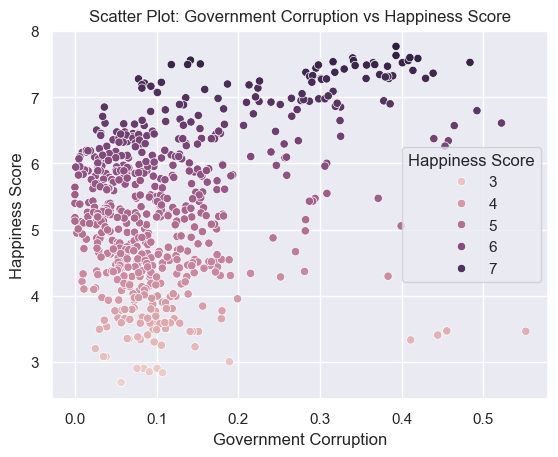

In [25]:
sc_df = plot_df.drop(columns=['Happiness Score'])

sns.set(color_codes=True)
for variable in sc_df.columns:
    sns.scatterplot(x=variable, y='Happiness Score', hue='Happiness Score', data=df)
    plt.title(f'Scatter Plot: {variable} vs Happiness Score')
    plt.show()

It can be seen that Happiness Rank is inversely proportional to Happiness Score (HS), this makes sense because a country with a higher HS, is going to rank higher, therefore, having a smaller value for this variable. However, we have to keep in mind that this is a categorical variable.

Also, it is noticeable that both Government Corruption and Generosity seem to have a rather poor relation with Happiness Score, while the rest do seem to have a linear relationship with Happiness Score.

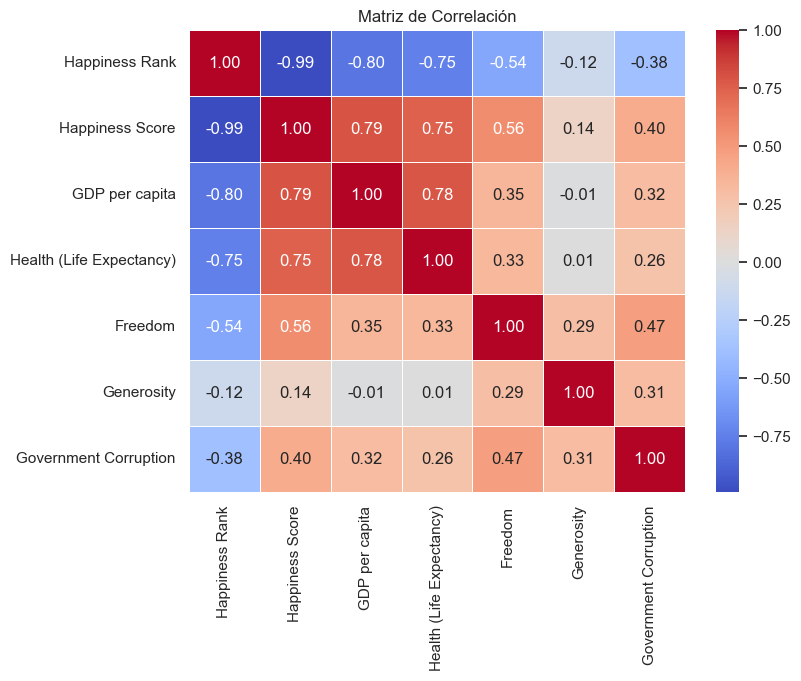

In [43]:
corr_matrix = plot_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

We can see that 'Generosity' is the variable that has the lowest correlation coefficient with Happiness Score, however this correlation coefficient is positive and significant, therefore, this column is worth keeping.

In [23]:
# pair_plot = sns.pairplot(plot_df, vars=plot_df.columns, hue="Happiness Score", height=2.5)
# plt.show()

In [28]:
df.head()

,Happiness Rank,Country,Happiness Score,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption
0,1,Switzerland,7.587,1.39651,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,7.561,1.30232,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,7.527,1.32548,0.87464,0.64938,0.34139,0.48357
3,4,Norway,7.522,1.45900,0.88521,0.66973,0.34699,0.36503
4,5,Canada,7.427,1.32629,0.90563,0.63297,0.45811,0.32957


### Model

#### Splitting data

In [29]:
X = df.drop('Happiness Score', axis = 1)
y = df['Happiness Score']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 779
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Happiness Rank            779 non-null    int64  
 1   Country                   779 non-null    object 
 2   GDP per capita            779 non-null    float64
 3   Health (Life Expectancy)  779 non-null    float64
 4   Freedom                   779 non-null    float64
 5   Generosity                779 non-null    float64
 6   Government Corruption     779 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 48.7+ KB


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(545, 7) (234, 7) (545,) (234,)


In [33]:
X_test.to_csv('../data/x_test_data.csv', index = False)
y_test.to_csv('../data/y_test_data.csv', index = False)

#### Feature selection

In [34]:
X_train['Happiness Rank'].nunique()

157

Happiness Rank is an ordinal categorical variable, and it has a very high cardinality. In order to use it, I would have to apply one hot enconding to each one of this ranks, which would result in way too many columns, even if I group this rank into new categories. It also has a extremely high negative correlation with the Happiness Score, and adding this variable might result in multicolineality problems.

For all these reasons, I'm going to drop it later on.

In [35]:
X_train['Country'].nunique()

165

We can see that the Country variable has a very high cardinality, which will have to be fixed.

I will be importing Country converter to get the continents of each country easily. This will get me a lower cardinality variable which will be easier to handle.

In [36]:
X_train['Continent'] = X_train['Country'].apply(get_continent)

In [37]:
del_cols(X_train)

,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption,Continent
24,1.063530,0.796610,0.542100,0.244340,0.092700,America
636,1.276000,1.029000,0.371000,0.261000,0.082000,Asia
623,0.091000,0.145000,0.065000,0.149000,0.076000,Africa
334,1.107353,0.616552,0.437454,0.162350,0.111093,America
363,1.416915,0.913476,0.505626,0.120573,0.163761,Asia
...,...,...,...,...,...,...
71,1.386040,1.013280,0.596080,0.394780,0.371240,Asia
106,0.881130,0.737930,0.262680,0.064310,0.063580,Africa
270,0.234306,0.106654,0.480791,0.322228,0.179436,Africa
435,0.648457,0.285349,0.096098,0.201870,0.136957,Africa


In [38]:
X_train['Continent'].value_counts()

Continent
Africa     158
Asia       156
Europe     141
America     83
Oceania      7
Name: count, dtype: int64

In [39]:
X_train.head()

,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption,Continent
24,1.063530,0.796610,0.542100,0.244340,0.092700,America
636,1.276000,1.029000,0.371000,0.261000,0.082000,Asia
623,0.091000,0.145000,0.065000,0.149000,0.076000,Africa
334,1.107353,0.616552,0.437454,0.162350,0.111093,America
363,1.416915,0.913476,0.505626,0.120573,0.163761,Asia


Now that i have reduced the cardinality, I have to perform a One-Hot encoding to this variable.

In [40]:
X_train = dummies(X_train)

In [41]:
X_train.head()

,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption,Continent_Africa,Continent_America,Continent_Asia,Continent_Europe,Continent_Oceania
24,1.063530,0.796610,0.542100,0.244340,0.092700,False,True,False,False,False
636,1.276000,1.029000,0.371000,0.261000,0.082000,False,False,True,False,False
623,0.091000,0.145000,0.065000,0.149000,0.076000,True,False,False,False,False
334,1.107353,0.616552,0.437454,0.162350,0.111093,False,True,False,False,False
363,1.416915,0.913476,0.505626,0.120573,0.163761,False,False,True,False,False


Now, we have to choose the best model to apply. In this case I'm going to compare between linear regression and random forest regression using Mean Squared Error and R squared. But first, I have to apply the transformations to the test data.

In [42]:
X_test['Continent'] = X_test['Country'].apply(get_continent)
del_cols(X_test)
X_test = dummies(X_test)

In [43]:
X_test.head()

,GDP per capita,Health (Life Expectancy),Freedom,Generosity,Government Corruption,Continent_Africa,Continent_America,Continent_Asia,Continent_Europe,Continent_Oceania
596,0.816,0.666,0.260,0.077,0.028,False,False,True,False,False
588,0.314,0.254,0.312,0.175,0.128,True,False,False,False,False
544,1.188,0.884,0.562,0.055,0.017,False,False,False,True,False
645,1.300,0.999,0.564,0.375,0.151,False,False,False,True,False
488,1.233,0.854,0.543,0.064,0.034,False,False,False,True,False


In [44]:
linear_reg_model = LinearRegression() # creatinng model

linear_reg_model.fit(X_train, y_train) # training lr model

y_pred_linear = linear_reg_model.predict(X_test) # predictions with lr model with test data

# comparing metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Results:")
print("Mean Squared Error (MSE):", mse_linear)
print("Coefficient of determination (R^2):", r2_linear)

Linear Regression Model Results:
Mean Squared Error (MSE): 0.2801418029842046
Coefficient of determination (R^2): 0.776403870230159


In [45]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42) # creatinng model

random_forest_model.fit(X_train, y_train) # training rf model

y_pred_rf = random_forest_model.predict(X_test) # predicting rf model with test daata

# comparing metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MSE):", mse_rf)
print("Coefficient of determination (R^2):", r2_rf)

Random Forest Regression Model Results:
Mean Squared Error (MSE): 0.2113802287319642
Coefficient of determination (R^2): 0.8312861538304734


As we can see, the Random Forest regression model behaves better in both MSE and R^2

This means that the predicted values are closer to the actual values, therefore having smaller errors, and that the random forest model explains 83% of the variance of the happiness score.

Based on this, I'm going to use the Random Forest regression model.

In [46]:
joblib.dump(random_forest_model, 'rf_regressor.pkl')

['rf_regressor.pkl']

In [47]:
# from sklearn.model_selection import GridSearchCV

# # param grid to adjust
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30]
# }

# # create rf model
# random_forest_model = RandomForestRegressor(random_state=42)

# # applying grid search
# grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # obtianing the best hiperparameters
# best_params = grid_search.best_params_
# print("Optimal hiperparameters:", best_params)

# # creating rf model with best parameters
# best_random_forest_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)

# # training model with best params
# best_random_forest_model.fit(X_train, y_train)


In [48]:
# # get feature importance
# feature_importance = best_random_forest_model.feature_importances_

# # Associate importances to each column
# feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # plot feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# plt.xlabel('Importancia de Características')
# plt.title('Importancia de Características')
# plt.show()